In [81]:
#Import libraries for data analysis
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from numpy import argmax

In [22]:
#load the dataset
data = pd.read_csv('iris.data', low_memory=False)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [23]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [24]:
data.shape

(149, 5)

 Our data set has 149 rows and 5 features and our target variable is species

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [26]:
#To make sure our dataset doesn't contain any null variables
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [27]:
data.species

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
144    Iris-virginica
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
Name: species, Length: 149, dtype: object

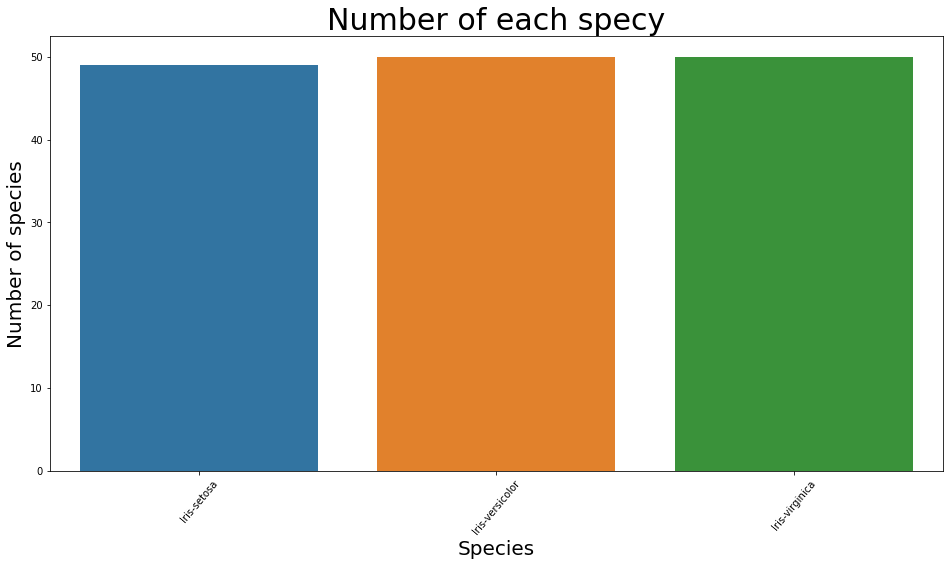

In [30]:
year = data['species'].unique()
years_count = data['species'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (16,8))
sns.barplot(x = year,
           y = years_count,
           palette = "tab10")
plt.xticks(rotation = 50)
plt.xlabel('Species',fontsize=20)
plt.ylabel('Number of species',fontsize=20)
plt.title('Number of each specy',fontsize=30)
plt.show()

As we can see our dataset is balanced

In [39]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [40]:
data.skew()

sepal_length    0.303098
sepal_width     0.350101
petal_length   -0.289459
petal_width    -0.117808
dtype: float64

skew methode returns values really close to 0 which means that our dataset is normally distributed

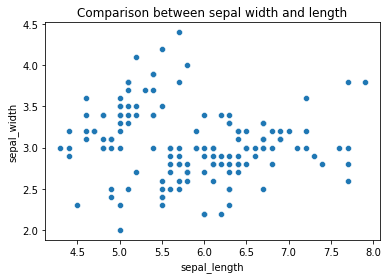

In [48]:
plt.title('Comparison between sepal width and length')
sns.scatterplot(x=data.sepal_length,y=data.sepal_width);

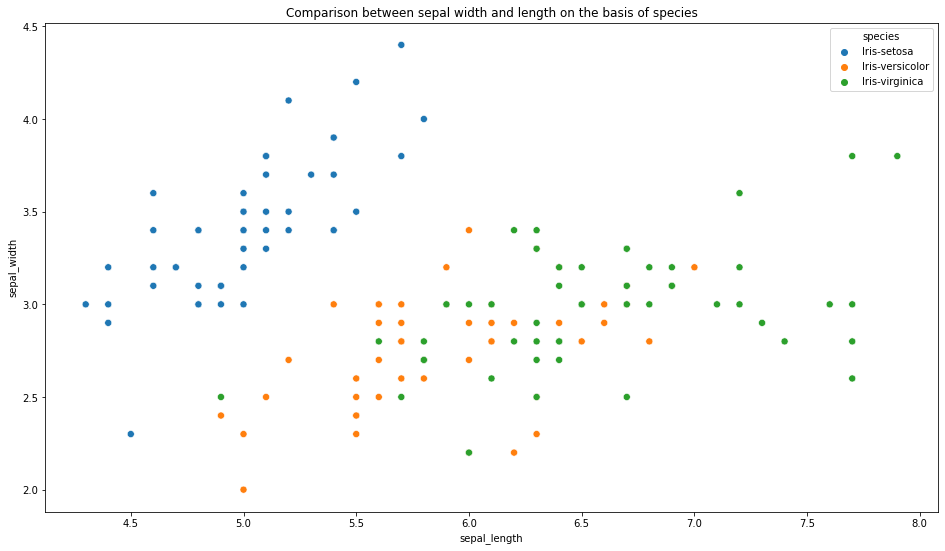

In [52]:
plt.figure(figsize=(16,9))
plt.title('Comparison between sepal width and length on the basis of species')
sns.scatterplot(x=data['sepal_length'], y=data['sepal_width'], hue = data['species'], s= 50);

 +The sepal length of iris_setosa varies between 1.5 and 5.6 whereas it's width varies between 2.8 and 4.2
 +The sepal length of iris_versicolor varies between 5 and 7 whereas it's width varies between 2 and 3.5
 +The sepal length of iris_verginica varies between 5.5 and 7.8 whereas it's width varies between 2.3 and 3.8

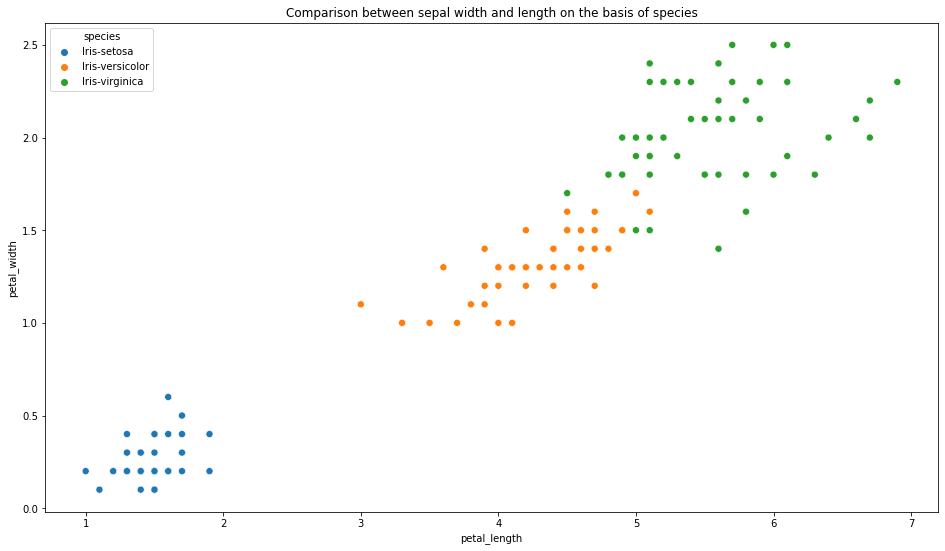

In [53]:
plt.figure(figsize=(16,9))
plt.title('Comparison between sepal width and length on the basis of species')
sns.scatterplot(x=data['petal_length'], y=data['petal_width'], hue = data['species'], s= 50);

 +The petal length of iris_setosa varies between 1 and 2 whereas it's width varies between 0.1 and 0.6
 +The petal length of iris_versicolor varies between 3 and 5 whereas it's width varies between 0.8 and 1.8
 +The petal length of iris_verginica varies between 5 and 7 whereas it's width varies between 1.5 and 2.5

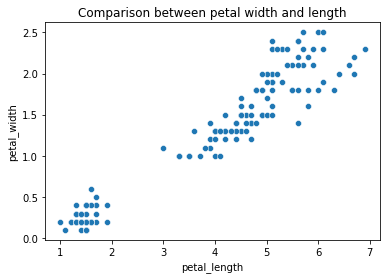

In [55]:
#Graphical presentation of the remarques above:
plt.title('Comparison between petal width and length')
sns.scatterplot(x=data['petal_length'], y=data['petal_width']);

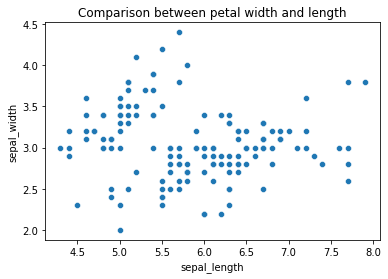

In [56]:
plt.title('Comparison between petal width and length')
sns.scatterplot(x=data['sepal_length'], y=data['sepal_width']);

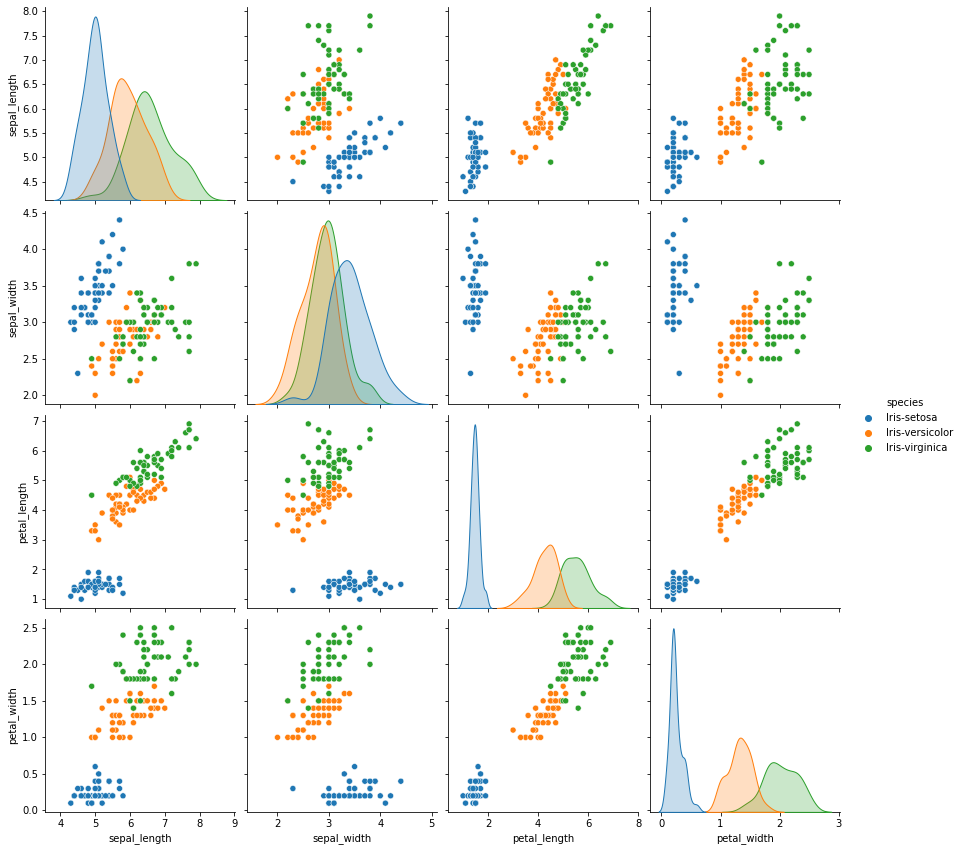

In [57]:
sns.pairplot(data,hue="species",height=3);

these graphics represents the relationship between variables and the target we can conclude that iris stosa has a hige 
variety in it's caracteristics; petal width and length are small in comparaison with sepal width and length

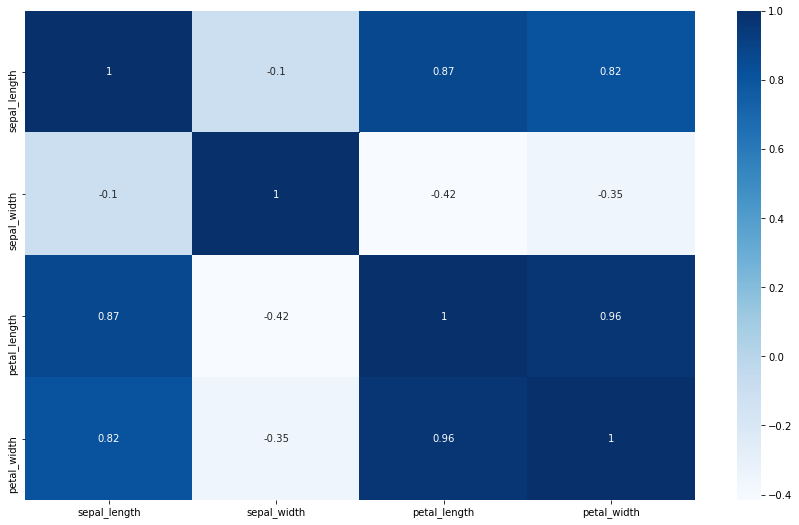

In [58]:
fig = plt.figure(figsize = (15,9))
sns.heatmap(data.corr(), cmap='Blues', annot = True);

Depending on the matrics we can conclude that there is a high correlation between petal_length and petal_width,
and a good correlation between petal_length and sepal_length as well as between petal_width and sepal_length

In [126]:
X = iris.data
Y = iris.target

In [127]:
#Split our data into training and testing data for building and testing our model
trainX, valX, trainY, valY = train_test_split(X,Y,random_state=0)

In [128]:
#Here we're specifically using DecisionTreeRegression algorithm
new_model=DecisionTreeRegressor(random_state=0)

In [130]:
trainX.shape

(112, 4)

In [131]:
trainY.shape

(112,)

In [132]:
new_model.fit(trainX, trainY)

DecisionTreeRegressor(random_state=0)

In [133]:
prediction=new_model.predict(valX)
print(prediction)

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0. 2. 1. 0. 2. 2. 1. 0. 2.]


In [134]:
err=mean_absolute_error(valY,prediction )
print(err)

0.02631578947368421


 +The mean absolute error (MAE) turns out to be 0.026315.This tells us that the average difference between the actual data value

  and the value predicted by the model is 0.026315.

 +We can compare this MAE to the MAE obtained by other forecast models to see which models perform best.

 +The lower the MAE for a given model, the more closely the model is able to predict the actual values.